## 1. Configuraci√≥n inicial y carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuraci√≥n de visualizaci√≥n
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

# Configurar tama√±o de figuras por defecto
plt.rcParams['figure.figsize'] = (12, 8)

# Carga del dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

## 2. Exploraci√≥n b√°sica del dataset

In [2]:
# Informaci√≥n general del dataset
print("\nInformaci√≥n general del dataset:")
df.info()




Informaci√≥n general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth          

In [3]:
# Estad√≠sticas descriptivas b√°sicas
print("\nEstad√≠sticas descriptivas de variables num√©ricas:")
df.describe().T  # Transponemos para mejor visualizaci√≥n


Estad√≠sticas descriptivas de variables num√©ricas:


count       mean       std   min   25%   50%   75%  \
Diabetes_012          253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
Diabetes_012           2.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [46]:
# Verificar valores nulos
print("\nVerificaci√≥n de valores nulos por columna:")
df.isnull().sum()




Verificaci√≥n de valores nulos por columna:


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [47]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nN√∫mero de filas duplicadas: {duplicados}")


N√∫mero de filas duplicadas: 23899


In [55]:
# Verificar dimensiones del dataset
print(f"\nDimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")

# Ver nombres de columnas
print("\nNombres de columnas:")
print(df.columns.tolist())



Dimensiones del dataset: 253680 filas x 22 columnas

Nombres de columnas:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


## 3. An√°lisis de variables num√©ricas

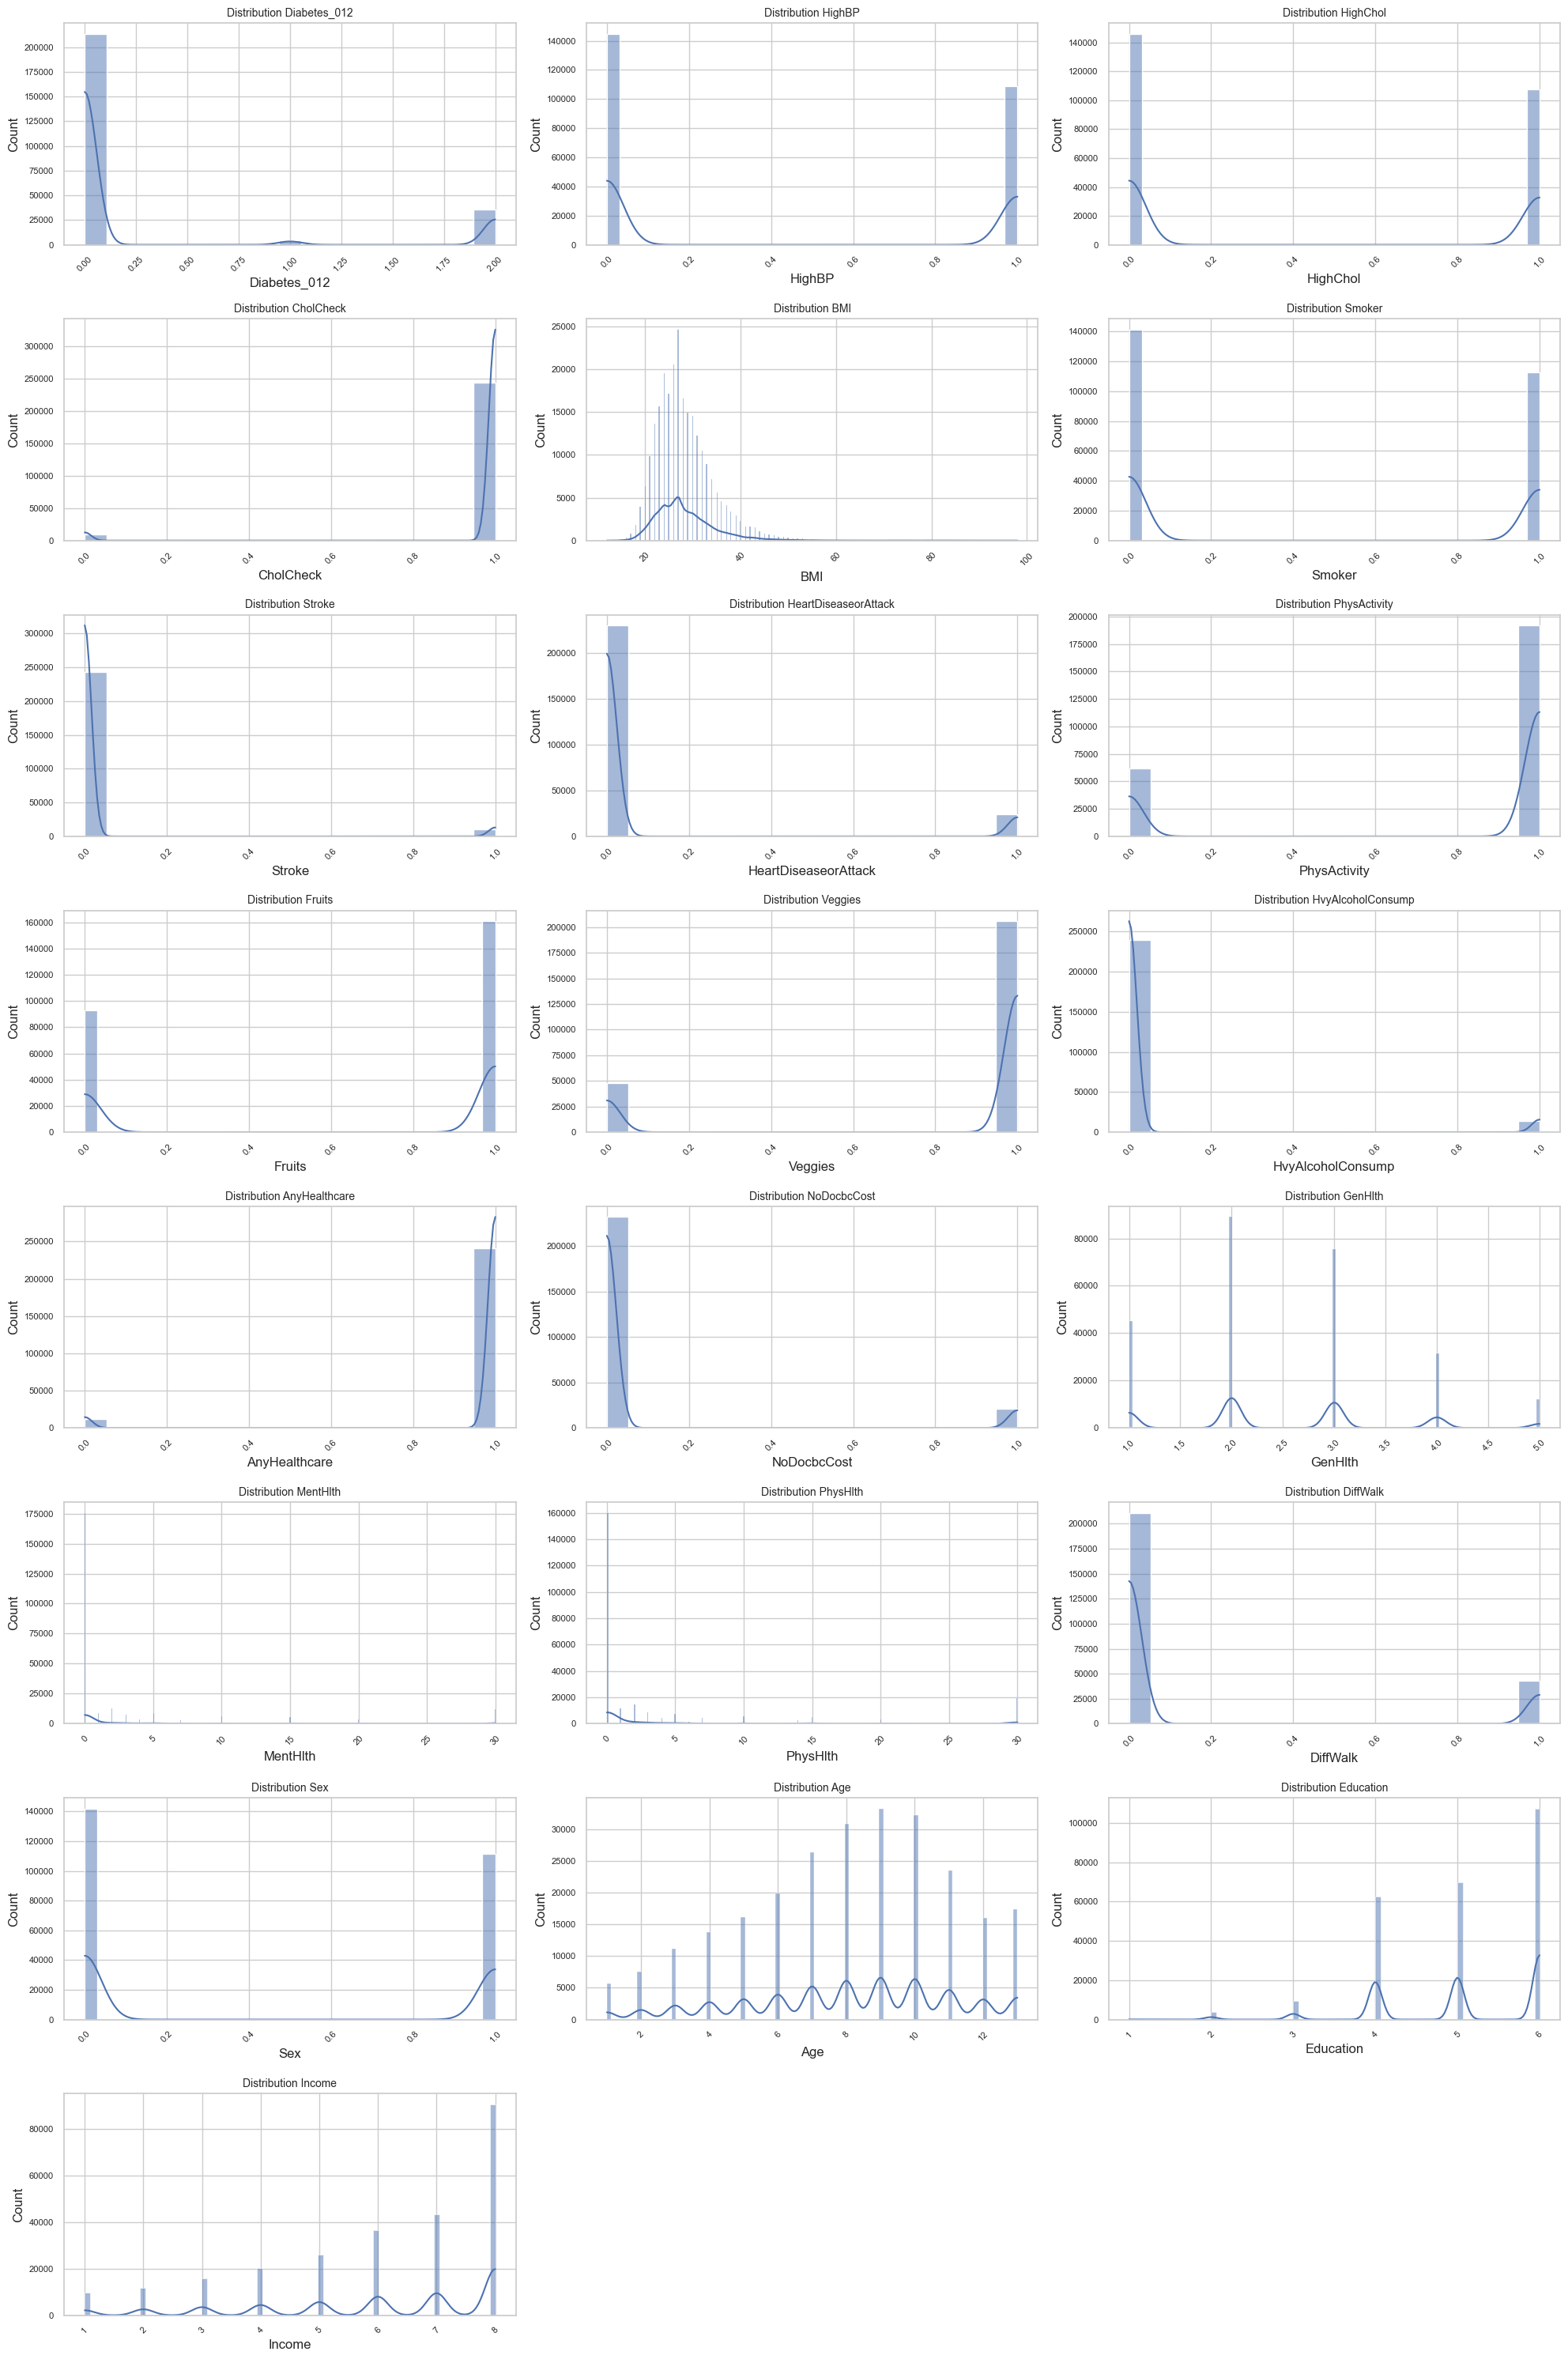


Estad√≠sticas descriptivas detalladas:
                         count       mean       std   min    1%    5%   25%  \
Diabetes_012          253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   0.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   0.0   
CholCheck             253680.0   0.962670  0.189571   0.0   0.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  18.0  20.0  24.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   0.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   0.0   0.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   0.0   0.0   
Veggies               253680.0   0.811420  0.391175   0.0   0.0   0.0   1.0   
HvyAlcoholCo

In [56]:
num_cols = 3 
num_rows = 8  

plt.figure(figsize=(20, 30))  
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i+1)  
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}', fontsize=10)
    plt.xticks(rotation=45)
    plt.tick_params(axis='both', which='major', labelsize=8)
plt.tight_layout()
plt.show()


# Estad√≠sticas descriptivas m√°s detalladas
print("\nEstad√≠sticas descriptivas detalladas:")
desc_stats = df[numeric_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T
desc_stats['skew'] = df[numeric_cols].skew()
desc_stats['kurt'] = df[numeric_cols].kurt()
print(desc_stats)


# 3 An√°lisis de Variables Num√©ricas

## Caracter√≠sticas Generales del Dataset

- El dataset contiene **229,781 observaciones**
- La mayor√≠a de las variables son binarias (0/1)

## Variables de Salud Principales

### Diabetes_012 (Variable objetivo)

- 3 clases:  
  - 0 = No diabetes o solo durante el embarazo  
  - 1 = Prediabetes  
  - 2 = Diabetes
- **Media**: 0.326
- Distribuci√≥n asim√©trica positiva (`skew = 1.826`)
- El 75% de los casos tiene valor 0

### BMI (√çndice de Masa Corporal)

- **Media**: 28.69 (indica sobrepeso)
- **Rango**: 12-98
- Distribuci√≥n muy asim√©trica positiva (`skew = 2.064`)
- El 75% de la poblaci√≥n tiene BMI ‚â§ 32

### Salud Mental y F√≠sica

- **MentHlth** (d√≠as de mala salud mental en los √∫ltimos 30 d√≠as):  
  - Media = 3.51 d√≠as/mes
- **PhysHlth** (d√≠as de mala salud f√≠sica en los √∫ltimos 30 d√≠as):  
  - Media = 4.68 d√≠as/mes
- Ambas variables presentan alta asimetr√≠a positiva

## Variables Demogr√°ficas

### Edad

- **Media**: 8.09 (escala ordinal)
- **Rango**: 1-13  
  *(1 = 18‚Äì24 a√±os, 13 = 80 o m√°s)*
- Distribuci√≥n relativamente normal (`skew = -0.385`)

### Educaci√≥n

- **Media**: 4.98 (escala ordinal)
- **Rango**: 1-6  
  *(1 = sin estudios, 6 = universidad completa)*
- 75% de la poblaci√≥n tiene educaci√≥n nivel 6 o superior
- Distribuci√≥n ligeramente asim√©trica negativa

### Ingresos

- **Media**: 5.89 (escala ordinal)
- **Rango**: 1-8  
  *(1 = < $10,000, 8 = $75,000 o m√°s)*
- 75% de la poblaci√≥n tiene ingresos nivel 8 o superior
- Distribuci√≥n ligeramente asim√©trica negativa

## Variables de Comportamiento

### Actividad F√≠sica

- 73.3% de la poblaci√≥n realiza actividad f√≠sica
- Distribuci√≥n asim√©trica negativa

### Consumo de Alcohol

- 6.1% de la poblaci√≥n reporta consumo excesivo de alcohol
- Alta asimetr√≠a positiva (`skew = 3.679`)

## Variables de Acceso a la Salud

### Cobertura M√©dica

- 94.6% de la poblaci√≥n tiene acceso a atenci√≥n m√©dica
- Alta asimetr√≠a negativa (`skew = -3.950`)

### Costo como Barrera

- 9.3% de la poblaci√≥n reporta no poder ver al m√©dico por costo
- Distribuci√≥n asim√©trica positiva

## Conclusiones Principales

1. La poblaci√≥n muestra altos niveles de sobrepeso (BMI medio = 28.69)
2. Hay buena cobertura de atenci√≥n m√©dica (94.6%)
3. La mayor√≠a de las variables binarias muestran distribuciones asim√©tricas
4. Existe una correlaci√≥n potencial entre variables de salud f√≠sica y mental
5. La poblaci√≥n muestra buenos niveles de educaci√≥n e ingresos
6. Hay una proporci√≥n significativa de la poblaci√≥n con diabetes (32.6%)

> **Nota**: Estos hallazgos sugieren la necesidad de enfocarse en programas de prevenci√≥n de diabetes y manejo del peso, a pesar de la buena cobertura m√©dica y niveles socioecon√≥micos.


## 4. An√°lisis de la variable objetivo (Diabetes_012)

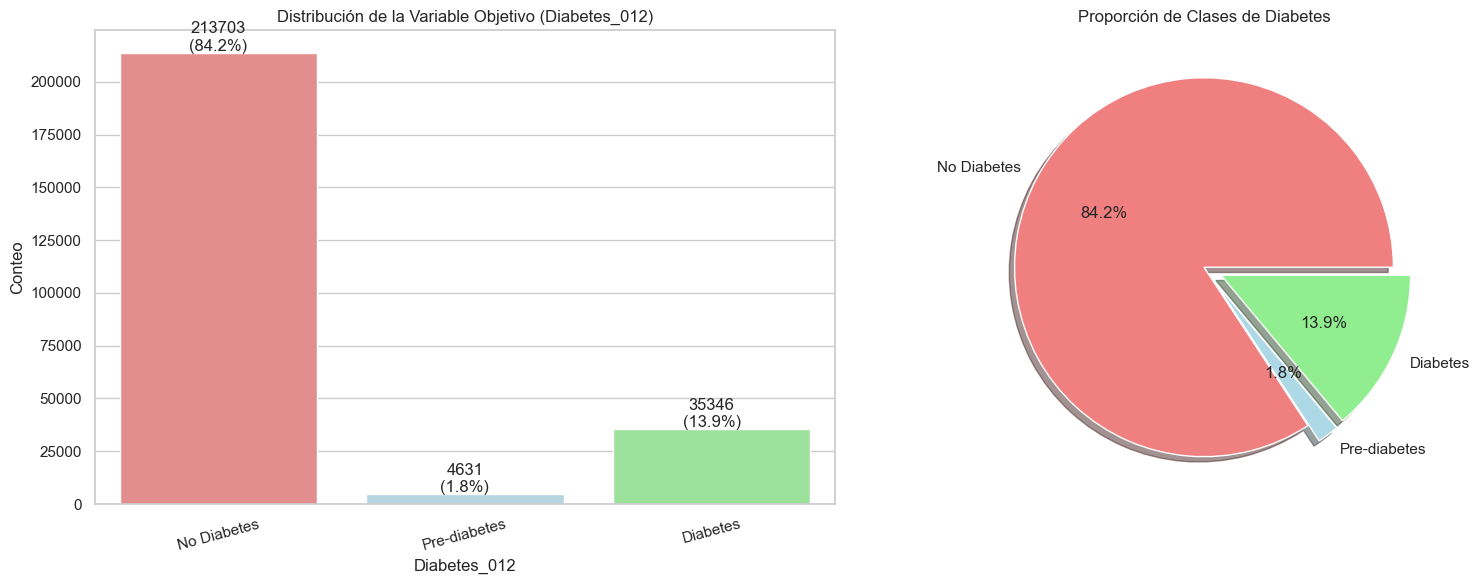

Distribuci√≥n de la variable Diabetes_012:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Porcentaje de cada clase:
Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64

--- An√°lisis del desbalance de clases ---
Proporci√≥n de desbalance (mayor√≠a/minor√≠a): 46.15:1


<Figure size 1200x600 with 0 Axes>

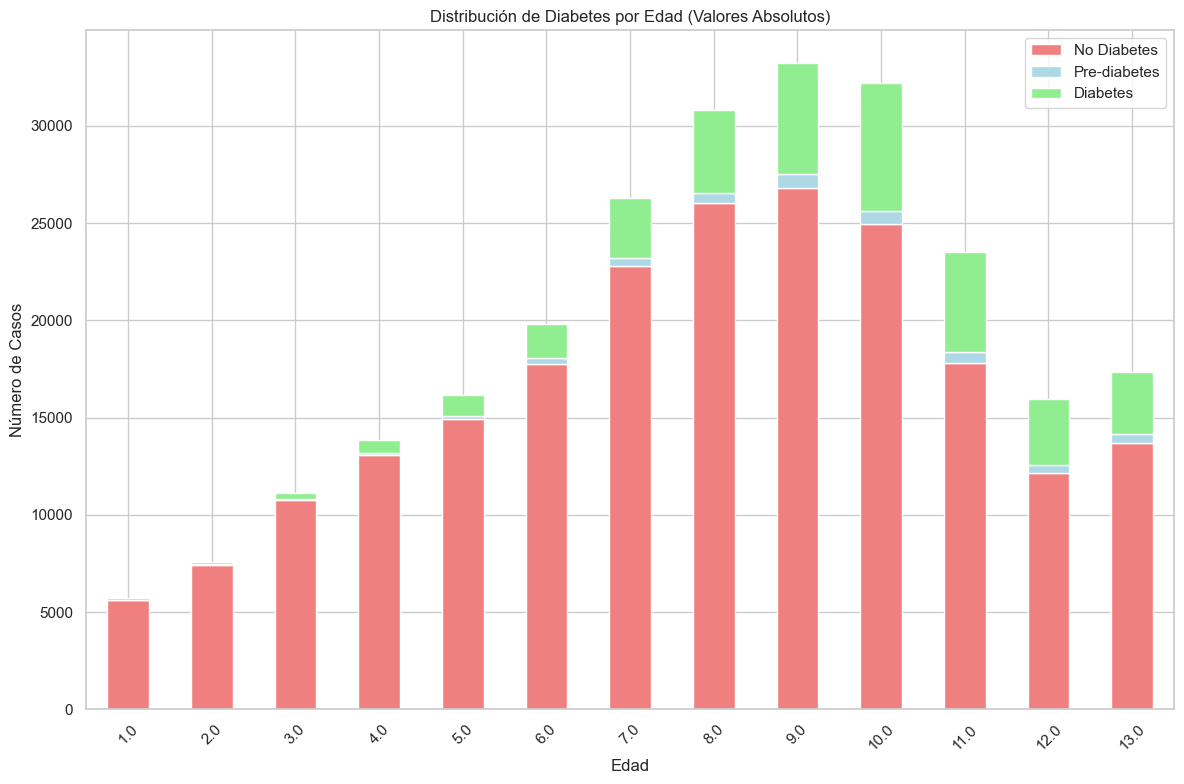

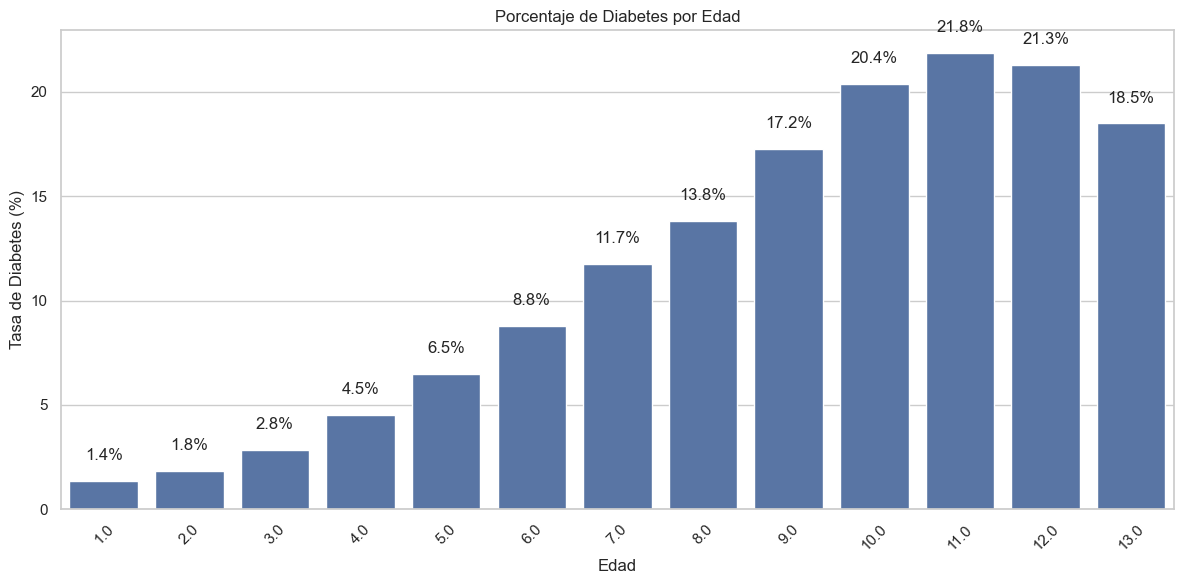

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ diabetes_counts –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω –ø–æ order
order = [0.0, 1.0, 2.0]
diabetes_counts = diabetes_counts.reindex(order)

labels = ['No Diabetes', 'Pre-diabetes', 'Diabetes']
colors = ['lightcoral', 'lightblue', 'lightgreen']

plt.figure(figsize=(16, 6))

# Barplot
plt.subplot(1, 2, 1)
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, order=order, palette=colors)
plt.title('Distribuci√≥n de la Variable Objetivo (Diabetes_012)')
plt.xlabel('Diabetes_012')
plt.ylabel('Conteo')

total = len(df)
for i, idx in enumerate(order):
    count = diabetes_counts[idx]
    percentage = count / total * 100
    plt.text(i, count + 1000, f"{int(count)}\n({percentage:.1f}%)", ha='center')

plt.xticks(ticks=range(3), labels=labels, rotation=15)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(diabetes_counts.values, 
        labels=labels,
        autopct='%1.1f%%', 
        colors=colors,
        explode=(0, 0.1, 0.1), 
        shadow=True)
plt.title('Proporci√≥n de Clases de Diabetes')

plt.tight_layout()
plt.show()

# 4.2 Estad√≠sticas detalladas de la variable objetivo
print("Distribuci√≥n de la variable Diabetes_012:")
print(df['Diabetes_012'].value_counts())
print("\nPorcentaje de cada clase:")
print(df['Diabetes_012'].value_counts(normalize=True) * 100)

# 4.3 An√°lisis del desbalance y sus implicaciones
print("\n--- An√°lisis del desbalance de clases ---")
class_sizes = df['Diabetes_012'].value_counts()
majority_class_size = class_sizes.max()
minority_class_size = class_sizes.min()
imbalance_ratio = majority_class_size / minority_class_size
print(f"Proporci√≥n de desbalance (mayor√≠a/minor√≠a): {imbalance_ratio:.2f}:1")

# 4.4 Visualizar distribuci√≥n por edad para entender variaci√≥n demogr√°fica
plt.figure(figsize=(12, 6))
age_dist = pd.crosstab(df['Age'], df['Diabetes_012'])
age_dist_pct = age_dist.div(age_dist.sum(axis=1), axis=0) * 100

# Gr√°fico de barras apiladas para distribuci√≥n por edad
age_dist.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribuci√≥n de Diabetes por Edad (Valores Absolutos)')
plt.xlabel('Edad')
plt.ylabel('N√∫mero de Casos')
plt.xticks(rotation=45)
plt.legend(['No Diabetes', 'Pre-diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

# Mostrar porcentajes de diabetes por edad
plt.figure(figsize=(12, 6))
sns.barplot(x=age_dist_pct.index, y=age_dist_pct[2])  # Clase 2 (Diabetes)
plt.title('Porcentaje de Diabetes por Edad')
plt.xlabel('Edad')
plt.ylabel('Tasa de Diabetes (%)')
plt.xticks(rotation=45)
for i, v in enumerate(age_dist_pct[2]):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
plt.show()



# 4. Resultados del An√°lisis de variable objetivo y recomendaciones para el Manejo del Desbalance en las Clases

## 4.1 An√°lisis de Caracter√≠sticas
- Identificar caracter√≠sticas m√°s discriminantes para la clase minoritaria (1.0)
- Priorizar estas caracter√≠sticas en el proceso de modelado
- Realizar an√°lisis de importancia de caracter√≠sticas espec√≠fico para la clase minoritaria

## 4.2 T√©cnicas de Muestreo
### T√©cnicas H√≠bridas
- Combinar submuestreo de la clase mayoritaria (0.0)
- Implementar sobremuestreo de las clases minoritarias
- Enfocarse especialmente en la clase 1.0 (< 2% de los datos)

### Generaci√≥n de Datos Sint√©ticos
- Implementar SMOTE y ADASYN
- Considerar t√©cnicas avanzadas basadas en GAN o VAE
- Generar datos sint√©ticos espec√≠ficamente para la clase 1.0

## 4.3 Ajustes en el Modelado
### Optimizaci√≥n de Modelos
- Ajustar umbrales de decisi√≥n post-entrenamiento
- Implementar K-fold estratificado
- Utilizar enfoque One-vs-Rest para clasificadores binarios

### T√©cnicas de Aprendizaje Avanzado
- Implementar Focal Loss para dar m√°s peso a ejemplos dif√≠ciles
- Utilizar Hardness-Aware Dynamic Sampling
- Aplicar meta-learning para optimizaci√≥n de hiperpar√°metros

## 4.4 Monitoreo y Evaluaci√≥n
- Evaluar m√©tricas por clase individualmente
- Monitorear espec√≠ficamente el rendimiento en la clase minoritaria
- Optimizar hiperpar√°metros considerando el balance entre clases

## 4.5 Consideraciones Especiales
> **Nota Importante**: Dada la extrema minor√≠a de la clase 1.0 (menos del 2%), se recomienda:
> - Combinar sobremuestreo sint√©tico con pesos de clase elevados
> - Implementar t√©cnicas de validaci√≥n cruzada estratificada
> - Priorizar la detecci√≥n de falsos negativos en la clase minoritaria

## 5. An√°lisis de correlaci√≥n entre variables

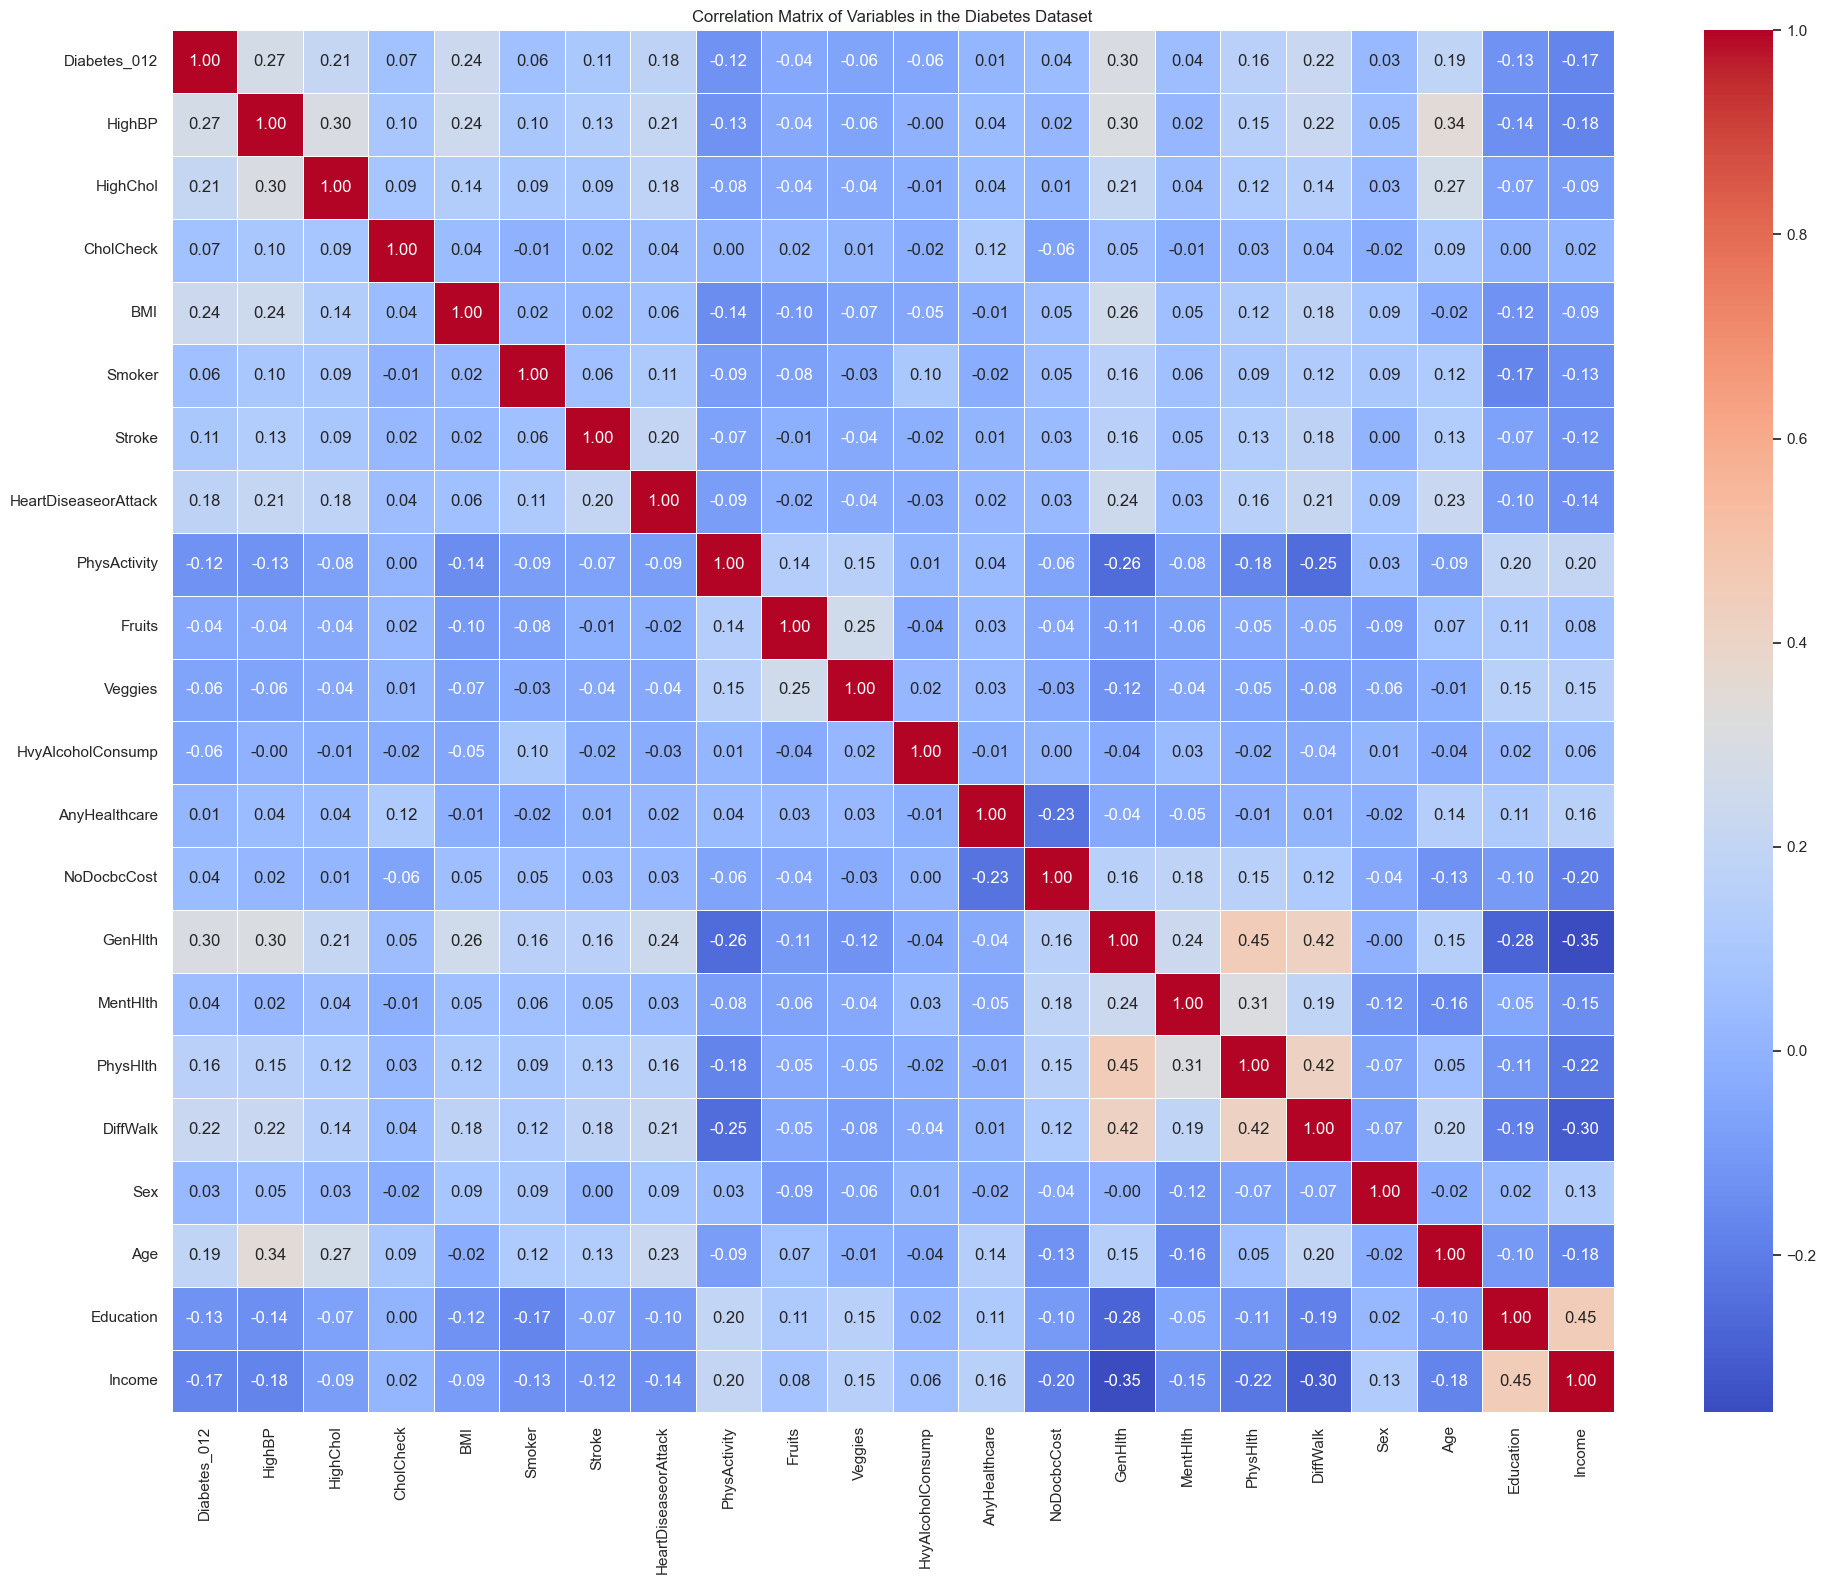


Correlations with Diabetes_012 (sorted):
Diabetes_012            1.000000
GenHlth                 0.297138
HighBP                  0.271668
BMI                     0.235887
DiffWalk                0.223567
HighChol                0.210668
Age                     0.186357
HeartDiseaseorAttack    0.178564
PhysHlth                0.161718
Stroke                  0.105887
CholCheck               0.068018
Smoker                  0.063040
MentHlth                0.044921
NoDocbcCost             0.037379
Sex                     0.030143
AnyHealthcare           0.014530
Fruits                 -0.042268
HvyAlcoholConsump      -0.057244
Veggies                -0.059353
PhysActivity           -0.121988
Education              -0.126862
Income                 -0.172611
Name: Diabetes_012, dtype: float64

Highly correlated variable pairs (|corr| >= 0.45):
Education and Income: 0.452
GenHlth and PhysHlth: 0.452

Checking correlations between main variables:
HighBP and HighChol: 0.298
GenHlth and Phy

In [59]:
df_corr = df.copy()

bool_columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

for col in bool_columns:
    df_corr[col] = df_corr[col].astype(int)

correlation_matrix = df_corr.corr(method='spearman')

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables in the Diabetes Dataset')
plt.tight_layout()
plt.show()

diabetes_correlations = correlation_matrix['Diabetes_012'].sort_values(ascending=False)
print("\nCorrelations with Diabetes_012 (sorted):")
print(diabetes_correlations)

high_corr_threshold = 0.45 
high_corr_pairs = []

# Get all pairs of variables
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= high_corr_threshold:
            high_corr_pairs.append(
                (correlation_matrix.columns[i],
                 correlation_matrix.columns[j],
                 corr_value)
            )

print("\nHighly correlated variable pairs (|corr| >= 0.45):")
if high_corr_pairs:
    for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{var1} and {var2}: {corr:.3f}")
else:
    print("No variable pairs found with correlation >= 0.45")

# Additional analysis for checking
print("\nChecking correlations between main variables:")
check_pairs = [
    ('HighBP', 'HighChol'),
    ('GenHlth', 'PhysHlth'),
    ('Income', 'Education'),
    ('PhysActivity', 'GenHlth'),
    ('BMI', 'GenHlth')
]

for var1, var2 in check_pairs:
    if var1 in correlation_matrix.columns and var2 in correlation_matrix.columns:
        corr = correlation_matrix.loc[var1, var2]
        print(f"{var1} and {var2}: {corr:.3f}")

<small>
# üìä Resultados del An√°lisis de Correlaci√≥n

## 5.1 Correlaciones con Diabetes_012

### Variables con Mayor Correlaci√≥n Positiva
1. **GenHlth (0.285)**
   - La salud general del paciente es el indicador m√°s fuertemente correlacionado
   - Peor salud general se asocia con mayor probabilidad de diabetes

2. **HighBP (0.262)**
   - La presi√≥n arterial alta muestra una correlaci√≥n importante
   - Confirma su conocida asociaci√≥n con la diabetes

3. **BMI (0.212)**
   - El √≠ndice de masa corporal elevado est√° correlacionado con diabetes
   - Reafirma la relaci√≥n entre sobrepeso/obesidad y riesgo de diabetes

4. **DiffWalk (0.211)**
   - La dificultad para caminar tiene una correlaci√≥n similar al BMI
   - Sugiere relaci√≥n entre problemas de movilidad y diabetes

5. **HighChol (0.203)**
   - El colesterol alto muestra correlaci√≥n significativa con diabetes

### Variables con Correlaci√≥n Negativa
1. **Income (-0.147)**
   - Ingresos m√°s bajos se asocian con mayor prevalencia de diabetes

2. **Education (-0.108)**
   - Menor nivel educativo se relaciona con mayor probabilidad de diabetes

3. **PhysActivity (-0.103)**
   - La falta de actividad f√≠sica est√° asociada con mayor riesgo de diabetes

4. **HvyAlcoholConsump (-0.067)**
   - Sorprendentemente, el consumo elevado de alcohol muestra correlaci√≥n negativa

## 5.2 Correlaciones entre Variables Predictoras

### Correlaciones Fuertes (|corr| ‚â• 0.45)
1. **GenHlth y PhysHlth (0.517)**
   - La salud general y la salud f√≠sica est√°n fuertemente correlacionadas
   - Podr√≠a indicar multicolinealidad

2. **PhysHlth y DiffWalk (0.467)**
   - Problemas de salud f√≠sica est√°n correlacionados con dificultad para caminar

### Correlaciones Moderadas
1. **Income y Education (0.419)**
   - Nivel educativo y nivel de ingresos muestran correlaci√≥n significativa

2. **HighBP y HighChol (0.284)**
   - Presi√≥n arterial alta y colesterol alto tienen correlaci√≥n moderada

## 5.3 Implicaciones para el Modelo de Predicci√≥n

### Potenciales Problemas de Multicolinealidad
Las variables con alta correlaci√≥n entre s√≠ podr√≠an generar redundancia en el modelo. Se recomienda:
- Selecci√≥n de caracter√≠sticas
- Regularizaci√≥n (como Ridge o Lasso)
- An√°lisis de componentes principales (PCA)

### Variables Clave para el Modelo
- **Priorizar**: GenHlth, HighBP, BMI, DiffWalk y HighChol
- **Raz√≥n**: Alta correlaci√≥n con la variable objetivo (diabetes)

### Factores Socioecon√≥micos
- La relaci√≥n inversa con ingresos y educaci√≥n sugiere importancia de factores socioecon√≥micos
- Podr√≠an representar acceso diferencial a atenci√≥n m√©dica o h√°bitos de salud

### Posibles Interacciones
Considerar interacciones entre variables clave:
- BMI y HighBP
- GenHlth y Age
- Estas interacciones podr√≠an mejorar el poder predictivo del modelo
</small>